Load libraries

In [0]:
from skimage import io, color
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab

Base Functions

In [0]:
###################################################################################################################
# Function: convolve2d
# Description: It allows us to apply convolution process to an image
# This function which takes an image and a kernel
# and returns the convolution of them
# Args:
#   image: a numpy array of size [image_height, image_width].
#   kernel: a numpy array of size [kernel_height, kernel_width].
# Returns:
#   a numpy array of size [image_height, image_width] (convolution output).
###################################################################################################################
def convolve2d(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))  # Flip the kernel
    output = np.zeros_like(image)  # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):  # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y:y + 3, x:x + 3]).sum()
    return output


Load image to be tranformed by convolution

In [65]:
######################################################
#Uncomment the block online or local depending your
#execution environment
######################################################
#Online
from google.colab import files
from io import BytesIO
from PIL import Image
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['cat.jpg']))
print("Height=", im.height, "Width=", im.width)

Saving cat.jpg to cat (4).jpg
Height= 647 Width= 970


Basic operations (overview)

(647, 970, 3)
(647, 970)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


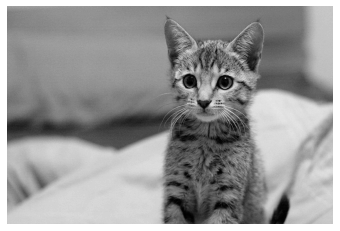

(649, 972)


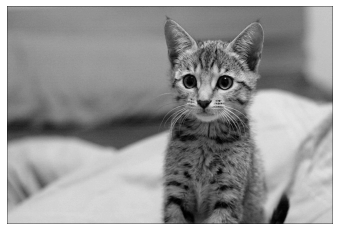

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


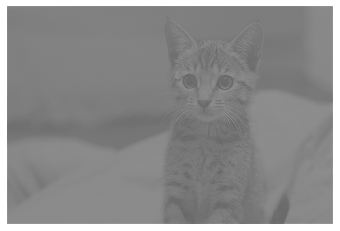

In [81]:
#Convert to gray scale by averaging the pixel values of three channels
imgarr = np.array(im)
print(imgarr.shape)
imgarr = color.rgb2gray(imgarr) 
print(imgarr.shape)

#Output array
output = np.zeros_like(imgarr)
print(output)

# Visualize the image
plt.imshow(imgarr, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

#Image padding introduces new pixels around the edges of an image
image_padded = np.zeros((imgarr.shape[0] + 2, imgarr.shape[1] + 2))
print(image_padded.shape)
image_padded[1:-1, 1:-1] = imgarr

plt.imshow(image_padded, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

#Kernels (Filter)
#kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
#kernel = np.array([[0,0,-1],[0,0,0],[-1,0,1]])
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
print(kernel)

#Convolution
for x in range(imgarr.shape[1]):  # Loop over every pixel of the image
        for y in range(imgarr.shape[0]):
            # element-wise multiplication of the kernel and the image
            # 3 is a parameter that depends on size of kernel
            output[y, x] = (kernel * image_padded[y:y + 3, x:x + 3]).sum()
#print(image_padded[0:0 + 3, 0:0 + 3])

plt.imshow(output, cmap=plt.cm.gray)
plt.axis('off')
plt.show()